# Figures for publication

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext blackcellmagic

In [3]:
%cd ..

c:\Users\stefa\Desktop\clinical-trial-landscape


In [4]:
import numpy as np
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("whitegrid", {"grid.color": "gainsboro"})

from tools import visualization

## Load data

In [5]:
grouper_column_names = [
    "country_ISO",
    "country_continent",
    "subregion",
    "economy_level",
    "consolidated_economy_level",
    "income_group",
    "consolidated_income_group",
    "hdi_category",
]

In [6]:
consolidated_counts_overall = {}
for grouper_column_name in grouper_column_names:
    consolidated_counts_overall[grouper_column_name] = pd.read_excel(
        "data/results/trials_sites_counts.xlsx",
        sheet_name="ovr_" + grouper_column_name,
    )

In [7]:
consolidated_counts_overall["country_continent"]

,country_continent,population_estimate,n_trials,n_trials_overall,of_total_trials_overall,trials_per_capita,n_trials_expected,factor_deviation_n_trials_from_expected,n_sites,n_sites_overall,of_total_sites_overall,sites_per_capita,n_sites_expected,factor_deviation_n_sites_from_expected
0,Africa,1.306370e+09,29,435,0.066667,2.219891e-08,74.189490,0.390891,107,21312,0.005021,8.190634e-08,3634.773343,0.029438
1,Asia,4.555914e+09,140,435,0.321839,3.072929e-08,258.732894,0.541099,1423,21312,0.066770,3.123413e-07,12676.127426,0.112258
2,Europe,7.454125e+08,297,435,0.682759,3.984371e-07,42.332387,7.015905,12716,21312,0.596659,1.705901e-05,2073.995012,6.131162
3,North America,5.837560e+08,267,435,0.613793,4.573829e-07,33.151829,8.053854,6322,21312,0.296640,1.082987e-05,1624.211003,3.892351
4,Oceania,4.120487e+07,76,435,0.174713,1.844442e-06,2.340048,32.477971,313,21312,0.014687,7.596189e-06,114.646197,2.730139
5,South America,4.270667e+08,54,435,0.124138,1.264440e-07,24.253353,2.226496,431,21312,0.020223,1.009210e-06,1188.247020,0.362719


In [8]:
consolidated_counts_per_phase = {}
for grouper_column_name in grouper_column_names:
    consolidated_counts_per_phase[grouper_column_name] = pd.read_excel(
        "data/results/trials_sites_counts.xlsx",
        sheet_name="phs_" + grouper_column_name,
    )

In [9]:
consolidated_counts_per_phase["country_continent"].head()

,phase,country_continent,population_estimate,n_trials,n_trials_phase,of_total_trials_phase,trials_per_capita,n_trials_expected,factor_deviation_n_trials_from_expected,n_sites,n_sites_phase,of_total_sites_phase,sites_per_capita,n_sites_expected,factor_deviation_n_sites_from_expected
0,PHASE1,Asia,4.555914e+09,6,64,0.093750,1.316970e-09,38.066449,0.157619,9,277,0.032491,1.975454e-09,164.756348,0.054626
1,PHASE2,Asia,4.555914e+09,35,123,0.284553,7.682322e-09,73.158956,0.478410,197,3432,0.057401,4.324050e-08,2041.313313,0.096506
2,PHASE3,Asia,4.555914e+09,92,183,0.502732,2.019353e-08,108.846252,0.845229,1156,15036,0.076882,2.537361e-07,8943.236297,0.129260
3,PHASE4,Asia,4.555914e+09,11,79,0.139241,2.414444e-09,46.988273,0.234101,61,2567,0.023763,1.338919e-08,1526.821467,0.039952
4,PHASE1,Europe,7.454125e+08,27,64,0.421875,3.622156e-08,6.228213,4.335112,63,277,0.227437,8.451697e-08,26.956485,2.337100


## Figure 1 - log-disproportionality of trial sites worldmap and regression

In [10]:
phase_country_data = consolidated_counts_per_phase["country_ISO"]
overall_country_data = consolidated_counts_overall["country_ISO"]

In [11]:
phase_country_data_nonzero = phase_country_data[
    phase_country_data["n_trials"] > 0
].copy()
overall_country_data_nonzero = overall_country_data[
    overall_country_data["n_trials"] > 0
].copy()

In [12]:
phase_country_data_nonzero["log10_factor_deviation_n_sites_from_expected"] = np.log10(
    phase_country_data_nonzero["factor_deviation_n_sites_from_expected"]
)
overall_country_data_nonzero["log10_factor_deviation_n_sites_from_expected"] = np.log10(
    overall_country_data_nonzero["factor_deviation_n_sites_from_expected"]
)

### Add continent info

In [13]:
ms_trials_socioeconomic = pd.read_excel(
    "data/results/trials_sites_counts.xlsx", sheet_name="Base_dataset"
)

In [14]:
country_socioeconomic_data = (
    ms_trials_socioeconomic[
        [
            "country_ISO",
            "country_continent",
            "subregion",
            "consolidated_income_group",
            "consolidated_economy_level",
            "hdi_category",
        ]
    ]
    .drop_duplicates()
    .reset_index(drop=True)
    .copy()
)

In [15]:
phase_country_data_nonzero = pd.merge(left=phase_country_data_nonzero, right=country_socioeconomic_data, on="country_ISO", how="left")
overall_country_data_nonzero = pd.merge(left=overall_country_data_nonzero, right=country_socioeconomic_data, on="country_ISO", how="left")

In [16]:
continents = sorted(list(phase_country_data_nonzero["country_continent"].drop_duplicates()))

### Load and prepare geometry data from naturalearth
https://www.naturalearthdata.com/

In [17]:
geo_data = gpd.read_file("data/source/naturalearth/110m_cultural/ne_110m_admin_0_countries.shx")

In [18]:
geo_data = geo_data[
    ~geo_data["CONTINENT"].isin(["Antarctica", "Seven seas (open ocean)"])
].copy()

In [19]:
geo_data = (
    geo_data[
        [
            "ADM0_A3",
            "SUBREGION",
            "geometry",
        ]
    ]
    .rename(
        columns={
            "ADM0_A3": "country_ISO",
            "SUBREGION": "subregion",
        }
    )
    .copy()
)

### Load and add HDI data

In [20]:
hdi_raw = pd.read_csv("data/source/unstats/human-development-index.csv")

In [21]:
max_year_hdi_per_country = (
    hdi_raw[["Entity", "Code", "Year"]]
    .groupby(["Entity", "Code"])
    .max()
    .reset_index()
)

In [22]:
hdi_raw = pd.merge(
    left=hdi_raw,
    right=max_year_hdi_per_country,
    on=["Entity", "Code", "Year"],
    how="inner",
)

In [23]:
hdi_data = (
    hdi_raw[["Entity", "Code", "Human Development Index"]]
    .rename(
        columns={
            "Entity": "hdi_country",
            "Code": "country_ISO",
            "Human Development Index": "hdi",
        }
    )
    .copy()
)

In [24]:
phase_country_data_nonzero = pd.merge(left=phase_country_data_nonzero, right=hdi_data[["country_ISO", "hdi"]], on="country_ISO", how="inner")
overall_country_data_nonzero = pd.merge(left=overall_country_data_nonzero, right=hdi_data[["country_ISO", "hdi"]], on="country_ISO", how="inner")

### Plot

In [25]:
continent_colors = ["black", "indigo", "deeppink", "orange", "olivedrab", "teal"]

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=((20, 20)), width_ratios=[15, 5])

for i in range(1, 5):
    g_world = visualization.plot_choropleth_map_country_level(
        trial_data=phase_country_data_nonzero[
            phase_country_data_nonzero["phase"] == "PHASE" + str(i)
        ],
        column_to_plot="factor_deviation_n_sites_from_expected",
        log_scale=True,
        log_scale_diverging_palette=True,
        colormap_minimum_value=-2.5,
        colormap_maximum_value=1.5,
        show_colorbar=True,
        edgecolor=u"black",
        edges_linewidth=0.25,
        geometry_base_dataframe=geo_data,
        geometry_column_name="geometry",
        country_id_column_name="country_ISO",
        base_color="silver",
        base_edgecolor=u"white",
        ax=axes[i - 1][0],
    )

    g_regression = visualization.linear_regression_and_scatter_plot(
        data=phase_country_data_nonzero[
            phase_country_data_nonzero["phase"] == "PHASE" + str(i)
        ],
        x_column="hdi",
        y_column="log10_factor_deviation_n_sites_from_expected",
        scatter_palette=continent_colors,
        scatter_hue_column="country_continent",
        scatter_hue_order=continents,
        scatter_alpha=.75,
        xlim=(0.55, 0.975),
        ylim=(-2.75, 2.25),
        n_points=100,
        ax=axes[i - 1][1],
    )

    axes[i - 1][1].legend(title="Continent", loc="upper left")
    axes[i - 1][1].set_xlabel("Human Development Index")
    axes[i - 1][1].set_ylabel(
        "$\mathregular{Log}_{10}$" + "-disproportionality of trial sites"
    )

    axes[i - 1][0].set_title(
        "ACEG"[i - 1]
        + ") "
        + "$\mathregular{Log}_{10}$"
        + "-disproportionality of actual number of phase "
        + str(i)
        + " trial sites vs. expected number of phase "
        + str(i)
        + " trial sites based on population"
    )
    axes[i - 1][1].set_title(
        "BDFH"[i - 1]
        + ") "
        + "$\mathregular{Log}_{10}$"
        + "-disproportionality of phase "
        + str(i)
        + " trial sites as function of HDI, linear regression"
    )

plt.subplots_adjust(hspace=0.75)
fig.tight_layout()
save_path = "figures/figure_1"
plt.savefig(save_path + ".pdf", format="pdf", bbox_inches="tight")
plt.savefig(save_path + ".svg", format="svg", bbox_inches="tight")
plt.savefig(save_path + ".png", format="png", bbox_inches="tight")
plt.savefig(
    save_path + ".tiff",
    format="tiff",
    dpi=600,
    pil_kwargs={"compression": "tiff_lzw"},
    bbox_inches="tight",
)

## Figure 1.1 A - maps only

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=((24, 10)))

for i in range(4):
    g_world = visualization.plot_choropleth_map_country_level(
        trial_data=phase_country_data_nonzero[
            phase_country_data_nonzero["phase"] == "PHASE" + str(i + 1)
        ],
        column_to_plot="factor_deviation_n_sites_from_expected",
        log_scale=True,
        log_scale_diverging_palette=True,
        colormap_minimum_value=-2.5,
        colormap_maximum_value=1.5,
        show_colorbar=True,
        edgecolor=u"black",
        edges_linewidth=0.25,
        geometry_base_dataframe=geo_data,
        geometry_column_name="geometry",
        country_id_column_name="country_ISO",
        base_color="silver",
        base_edgecolor=u"white",
        ax=axes[i // 2][i % 2],
    )

    axes[i // 2][i % 2].set_title(
        "ABCD"[i]
        + ") "
        + "$\mathregular{Log}_{10}$"
        + "-disproportionality of actual number of phase "
        + str(i + 1)
        + " trial sites vs. expected number of phase "
        + str(i + 1)
        + " trial sites based on population"
    )

plt.subplots_adjust(hspace=0.75)
fig.tight_layout()
save_path = "figures/figure_1_alternative_1"
plt.savefig(save_path + ".pdf", format="pdf", bbox_inches="tight")
plt.savefig(save_path + ".svg", format="svg", bbox_inches="tight")
plt.savefig(save_path + ".png", format="png", bbox_inches="tight")
plt.savefig(
    save_path + ".tiff",
    format="tiff",
    dpi=600,
    pil_kwargs={"compression": "tiff_lzw"},
    bbox_inches="tight",
)

## Figure 1.1 B - map and regression, all phases combined

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=((24, 8)), width_ratios=[18, 6])

g_world = visualization.plot_choropleth_map_country_level(
    trial_data=overall_country_data_nonzero,
    column_to_plot="factor_deviation_n_sites_from_expected",
    log_scale=True,
    log_scale_diverging_palette=True,
    colormap_minimum_value=-2.5,
    colormap_maximum_value=1.5,
    show_colorbar=True,
    edgecolor=u"black",
    edges_linewidth=0.25,
    geometry_base_dataframe=geo_data,
    geometry_column_name="geometry",
    country_id_column_name="country_ISO",
    base_color="silver",
    base_edgecolor=u"white",
    ax=axes[0],
)

g_regression = visualization.linear_regression_and_scatter_plot(
    data=overall_country_data_nonzero,
    x_column="hdi",
    y_column="log10_factor_deviation_n_sites_from_expected",
    scatter_palette=continent_colors,
    scatter_hue_column="country_continent",
    scatter_hue_order=continents,
    scatter_alpha=.75,
    #xlim=(0.55, 0.975),
    #ylim=(-2.75, 2.25),
    n_points=100,
    ax=axes[1],
)

axes[1].legend(title="Continent", loc="upper left")
axes[1].set_xlabel("Human Development Index")
axes[1].set_ylabel(
    "$\mathregular{Log}_{10}$" + "-disproportionality of trial sites"
)

axes[0].set_title(
    "A) "
    + "$\mathregular{Log}_{10}$"
    + "-disproportionality of actual number of trial sites vs. "
    + "expected number of phase sites based on population, "
    + "all phases combined"
)
axes[1].set_title(
    "B) "
    + "$\mathregular{Log}_{10}$"
    + "-disproportionality of trial sites as function of "
    + "HDI, linear regression, all phases combined"
)

fig.tight_layout()
save_path = "figures/figure_1_alternative_2"
plt.savefig(save_path + ".pdf", format="pdf", bbox_inches="tight")
plt.savefig(save_path + ".svg", format="svg", bbox_inches="tight")
plt.savefig(save_path + ".png", format="png", bbox_inches="tight")
plt.savefig(
    save_path + ".tiff",
    format="tiff",
    dpi=600,
    pil_kwargs={"compression": "tiff_lzw"},
    bbox_inches="tight",
)

## Figure 2 - combined heatmaps
To include:
* Trials per continent, relative
* Trial sites per continent
* Trial sites per region
* Trial sites per HDI

In [ ]:
fig = plt.figure(figsize=(14, 12))

# The subpanels have different dimensions, so we have to
# play around with the grid specs and create custom axes.
ax_l1 = plt.subplot2grid((16, 2), (0, 0), rowspan=6)
ax_l2 = plt.subplot2grid((16, 2), (6, 0), rowspan=6)
ax_l3 = plt.subplot2grid((16, 2), (12, 0), rowspan=4)
ax_r1 = plt.subplot2grid((16, 2), (0, 1), rowspan=20)
axes = [ax_l1, ax_l2, ax_l3, ax_r1]


g_l1 = visualization.plot_heatmap_per_phase(
    trial_data=consolidated_counts_per_phase["country_continent"],
    index_column_name="country_continent",
    value_column_name="of_total_trials_phase",
    annotation_format=".2%",
    phase_column_name="phase",
    linear_palette="viridis",
    cbar=False,
    ax=ax_l1,
)
ax_l1.set_title("A) Percentage of trials with at least one site on a given continent")

g_l2 = visualization.plot_heatmap_per_phase(
    trial_data=consolidated_counts_per_phase["country_continent"],
    index_column_name="country_continent",
    value_column_name="of_total_sites_phase",
    annotation_format=".2%",
    phase_column_name="phase",
    cbar=False,
    ax=ax_l2,
)
ax_l2.set_title("B) Distribution of trial sites over continents")

g_l3 = visualization.plot_heatmap_per_phase(
    trial_data=consolidated_counts_per_phase["hdi_category"],
    index_column_name="hdi_category",
    value_column_name="of_total_sites_phase",
    annotation_format=".2%",
    phase_column_name="phase",
    cbar=False,
    ax=ax_l3,
)
ax_l3.set_title("C) Distribution of trial sites over HDI categories")

g_r1 = visualization.plot_heatmap_per_phase(
    trial_data=consolidated_counts_per_phase["subregion"],
    index_column_name="subregion",
    value_column_name="of_total_sites_phase",
    annotation_format=".2%",
    phase_column_name="phase",
    cbar=False,
    ax=ax_r1,
)
ax_r1.set_title("D) Distribution of trial sites over geographical regions")

for ax in axes:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
fig.tight_layout()

save_path = "figures/figure_2"
plt.savefig(save_path + ".pdf", format="pdf", bbox_inches="tight")
plt.savefig(save_path + ".svg", format="svg", bbox_inches="tight")
plt.savefig(save_path + ".png", format="png", bbox_inches="tight")
plt.savefig(
    save_path + ".tiff",
    format="tiff",
    dpi=600,
    pil_kwargs={"compression": "tiff_lzw"},
    bbox_inches="tight",
)

## Figure 2.1 - regression instead of heatmap for HDI

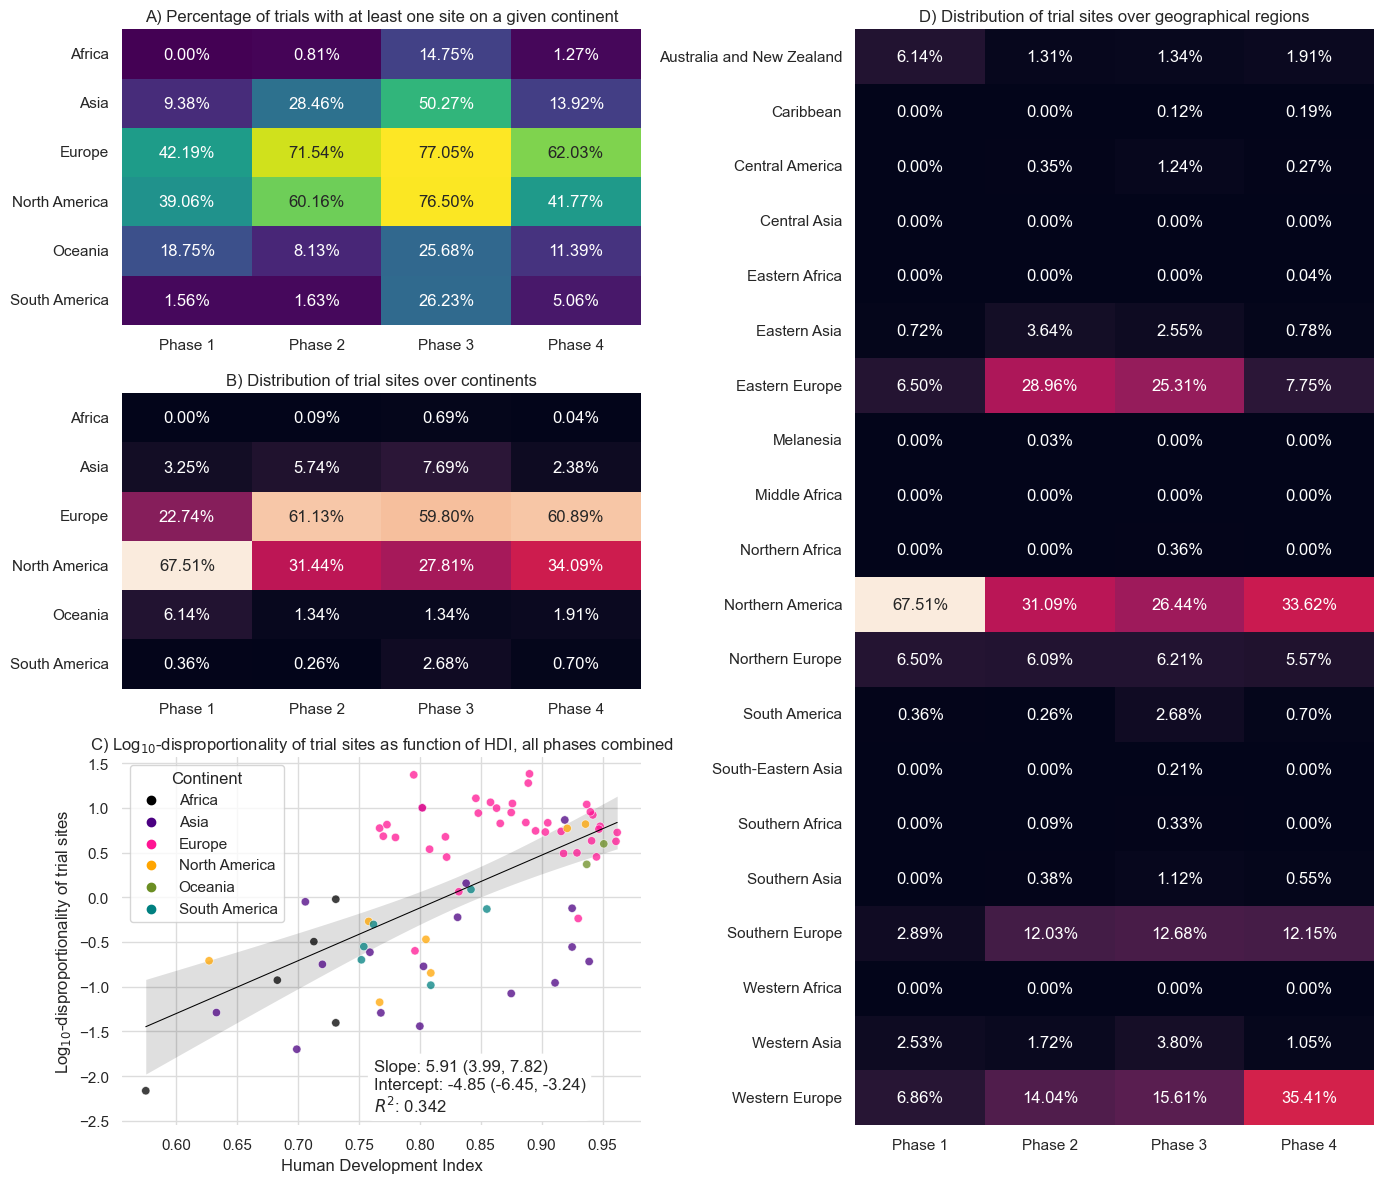

In [28]:
fig = plt.figure(figsize=(14, 12))

# The subpanels have different dimensions, so we have to
# play around with the grid specs and create custom axes.
ax_l1 = plt.subplot2grid((16, 2), (0, 0), rowspan=5)
ax_l2 = plt.subplot2grid((16, 2), (5, 0), rowspan=5)
ax_l3 = plt.subplot2grid((16, 2), (10, 0), rowspan=6)
ax_r1 = plt.subplot2grid((16, 2), (0, 1), rowspan=20)
axes = [ax_l1, ax_l2, ax_l3, ax_r1]


g_l1 = visualization.plot_heatmap_per_phase(
    trial_data=consolidated_counts_per_phase["country_continent"],
    index_column_name="country_continent",
    value_column_name="of_total_trials_phase",
    annotation_format=".2%",
    phase_column_name="phase",
    linear_palette="viridis",
    cbar=False,
    ax=ax_l1,
)
ax_l1.set_title("A) Percentage of trials with at least one site on a given continent")

g_l2 = visualization.plot_heatmap_per_phase(
    trial_data=consolidated_counts_per_phase["country_continent"],
    index_column_name="country_continent",
    value_column_name="of_total_sites_phase",
    annotation_format=".2%",
    phase_column_name="phase",
    cbar=False,
    ax=ax_l2,
)
ax_l2.set_title("B) Distribution of trial sites over continents")

g_l3 = visualization.linear_regression_and_scatter_plot(
    data=overall_country_data_nonzero,
    x_column="hdi",
    y_column="log10_factor_deviation_n_sites_from_expected",
    scatter_palette=continent_colors,
    scatter_hue_column="country_continent",
    scatter_hue_order=continents,
    scatter_alpha=.75,
    n_points=100,
    ax=ax_l3,
)

ax_l3.legend(title="Continent", loc="upper left")
ax_l3.set_title(
    "C) "
    + "$\mathregular{Log}_{10}$"
    + "-disproportionality of trial sites as function of "
    + "HDI, all phases combined"
)

g_r1 = visualization.plot_heatmap_per_phase(
    trial_data=consolidated_counts_per_phase["subregion"],
    index_column_name="subregion",
    value_column_name="of_total_sites_phase",
    annotation_format=".2%",
    phase_column_name="phase",
    cbar=False,
    ax=ax_r1,
)
ax_r1.set_title("D) Distribution of trial sites over geographical regions")

for ax in axes:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
ax_l3.set_xlabel("Human Development Index")
ax_l3.set_ylabel(
    "$\mathregular{Log}_{10}$" + "-disproportionality of trial sites"
)

fig.tight_layout()

save_path = "figures/figure_2_alternative_1"
plt.savefig(save_path + ".pdf", format="pdf", bbox_inches="tight")
plt.savefig(save_path + ".svg", format="svg", bbox_inches="tight")
plt.savefig(save_path + ".png", format="png", bbox_inches="tight")
plt.savefig(
    save_path + ".tiff",
    format="tiff",
    dpi=600,
    pil_kwargs={"compression": "tiff_lzw"},
    bbox_inches="tight",
)

## Figure for GitHub README summary

### Prepare data

In [ ]:
overall_country_data = consolidated_counts_overall["country_ISO"]

In [ ]:
overall_country_data_nonzero = overall_country_data[
    overall_country_data["n_trials"] > 0
].copy()

### Add continent info

In [ ]:
overall_country_data_nonzero = pd.merge(left=overall_country_data_nonzero, right=country_socioeconomic_data, on="country_ISO", how="left")

### Plot

In [ ]:
fig, ax = plt.subplots(1, figsize=(15, 15))

g = visualization.plot_choropleth_map_country_level(
    trial_data=overall_country_data_nonzero,
    column_to_plot="factor_deviation_n_sites_from_expected",
    log_scale=True,
    log_scale_diverging_palette=True,
    colormap_minimum_value=-2.5,
    colormap_maximum_value=1.5,
    show_colorbar=True,
    edgecolor=u"black",
    edges_linewidth=0.25,
    geometry_base_dataframe=geo_data,
    geometry_column_name="geometry",
    country_id_column_name="country_ISO",
    base_color="silver",
    base_edgecolor=u"white",
    ax=None,
)
g.set_title("$\mathregular{Log}_{10}$" + "-disproportionality of actual number of trial sites vs. expected number of trial sites based on population")

fig.tight_layout()
save_path = "figures/log10_disproportionality_all_phases"
plt.savefig(save_path + ".pdf", format="pdf", bbox_inches="tight")
plt.savefig(save_path + ".svg", format="svg", bbox_inches="tight")
plt.savefig(save_path + ".png", format="png", bbox_inches="tight")
plt.savefig(
    save_path + ".tiff",
    format="tiff",
    dpi=600,
    pil_kwargs={"compression": "tiff_lzw"},
    bbox_inches="tight",
)